# Análisis de la Duración de Estancia hospitalaria

#### Importamos las librerías necesarias.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


## Esta es la descripción de las dimensiones que recibimos

- *Available Extra Rooms in Hospital:* Habitaciones adicionales disponibles en el hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.
- *Department:* Área de atención a la que ingresa el paciente.
- *Ward_Facility_Code:* Código de la habitación del paciente.
- *doctor_name:* Nombre de el/la doctor/a a cargo del paciente.
- *staff_available:* Cantidad de personal disponible al momento del ingreso del paciente.
- *patientid:* Identificador del paciente.
- *Age:* Edad del paciente.
- *gender:* Género del paciente.
- *Type of Admission:* Tipo de ingreso registrado según la situación de ingreso del paciente.
- *Severity of Illness:* Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.
- *health_conditions:* Condiciones de salud del paciente.
- *Visitors with Patient:* Cantidad de visitantes registrados para el paciente.
- *Insurance:* Indica si la persona posee o no seguro de salud.
- *Admission_Deposit:* Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación.
- *Stay (in days):* Días registrados de estancia hospitalaria.​

#### Con la librería pandas para leer los archivos. Observó las columnas del documento con .head().

In [3]:
DF = pd.read_csv("https://raw.githubusercontent.com/MelissaContreras/Datathon-1/main/hospitalizaciones_train.csv")
DF.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


#### Analizo sí hay datos faltantes.

In [171]:
DF.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

#### Dropeo las columnas que no aportan información relevante para determinar sí la estancia del paciente será larga o corta ( se considera corta hasta los 8 días de internación).

In [4]:
DF2 = DF.drop(['Ward_Facility_Code', 'doctor_name', 'patientid', 'Visitors with Patient', 'gender', 'Admission_Deposit'], axis=1)
DF2.head()

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
0,4,gynecology,0,41-50,Trauma,Extreme,Diabetes,Yes,8
1,4,gynecology,2,31-40,Trauma,Minor,Heart disease,No,9
2,2,gynecology,8,21-30,Trauma,Extreme,Diabetes,Yes,7
3,4,gynecology,7,31-40,Urgent,Moderate,None,No,8
4,2,anesthesia,10,71-80,Trauma,Moderate,Diabetes,No,34


### Reviso cuántas características hay por columna en las variables categóricas, es decir, variables no numéricas.
#### Las variables categóricas pueden ser de dos tipos:
#### - Variables ordinales: sus valores pueden ser ordenados jerárquicamente, como las columnas de "Type of Admission" y "Severity of Illness".
#### - Variables nominales: no se puede establecer un orden en sus categorías, como en las columnas "Department" y "health_conditions".

In [173]:
DF2["Department"].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [174]:
DF2["Type of Admission"].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [175]:
DF2["Severity of Illness"].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [176]:
DF2["health_conditions"].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

#### Transformo los datos de la columna de salida "Stay (in days)" con pd.cut a sistema binario. Siendo "0" equivalente a estancia corta (8 días como máximo) y "1" es equivalente a estancia larga (desde 9 dias en adelante), para poder ingestar el modelo de clasificación.

In [5]:
DF2['length of stay'] = pd.cut(x = DF2['Stay (in days)'],
bins=[DF2['Stay (in days)'].min()-1,
8,
DF2['Stay (in days)'].max()+1], 
labels=['0', '1'])

In [52]:
DF2

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),length of stay
0,4,gynecology,0,41-50,Trauma,Extreme,Diabetes,Yes,8,0
1,4,gynecology,2,31-40,Trauma,Minor,Heart disease,No,9,1
2,2,gynecology,8,21-30,Trauma,Extreme,Diabetes,Yes,7,0
3,4,gynecology,7,31-40,Urgent,Moderate,None,No,8,0
4,2,anesthesia,10,71-80,Trauma,Moderate,Diabetes,No,34,1
...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,1,31-40,Trauma,Minor,Asthama,Yes,8,0
409996,5,gynecology,5,21-30,Trauma,Extreme,Other,No,9,1
409997,4,gynecology,9,21-30,Emergency,Minor,Asthama,Yes,9,1
409998,10,gynecology,10,21-30,Trauma,Moderate,Other,Yes,9,1


### Gestión de características categóricas, es decir transformar estos datos a números ya que un modelo de Machine Learning solo trabaja con números.
#### Con LabelEncoder() para las categóricas nominales y OrdinalEncoder() para las categóricas ordinales.

In [6]:
# Instanciar LabelEncoder()

LabelEn = LabelEncoder()

DF2["Department"] = LabelEn.fit_transform(DF2["Department"])

In [7]:

DF2["Age"] = LabelEn.fit_transform(DF2["Age"])                   

In [8]:

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Urgent', 'Trauma','Emergency']])

# Entrenamos el codificador con la variable "Type of Admission" y la transformamos.
encoder.fit(DF2[["Type of Admission"]])
DF2["Type of Admission"] = encoder.transform(DF2[["Type of Admission"]])

In [9]:

# Creamos el codificador indicandole el orden de la variables
encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])

# Entrenamos el codificador con la variable "Severity of Illness" y la transformamos.
encoder1.fit(DF2[["Severity of Illness"]])
DF2["Severity of Illness"] = encoder1.transform(DF2[["Severity of Illness"]])

In [10]:
DF2["health_conditions"] = LabelEn.fit_transform(DF2["health_conditions"])

In [11]:
DF2["Insurance"] = LabelEn.fit_transform(DF2["Insurance"])

In [12]:

DF2

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),length of stay
0,4,2,0,4,1.0,2.0,1,1,8,0
1,4,2,2,3,1.0,0.0,2,0,9,1
2,2,2,8,2,1.0,2.0,1,1,7,0
3,4,2,7,3,0.0,1.0,4,0,8,0
4,2,1,10,7,1.0,1.0,1,0,34,1
...,...,...,...,...,...,...,...,...,...,...
409995,1,2,1,3,1.0,0.0,0,1,8,0
409996,5,2,5,2,1.0,2.0,5,0,9,1
409997,4,2,9,2,2.0,0.0,0,1,9,1
409998,10,2,10,2,1.0,1.0,5,1,9,1


#### Observamos la Correlación de las columnas una vez tranformadas en datos numéricos

In [13]:
DF2.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_18264\3164217445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF2.corr()


,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.021235,-0.003064,-0.029921,-0.020866,-0.037610,0.001643,0.002438,-0.019383
Department,-0.021235,1.000000,0.016304,0.013096,0.037395,0.006407,-0.000344,-0.000714,-0.204050
staff_available,-0.003064,0.016304,1.000000,0.001818,0.002255,0.001793,-0.001500,0.001245,0.006673
Age,-0.029921,0.013096,0.001818,1.000000,-0.005304,0.051760,0.037140,-0.002472,0.585201
Type of Admission,-0.020866,0.037395,0.002255,-0.005304,1.000000,-0.056357,-0.001768,0.002062,-0.035811
Severity of Illness,-0.037610,0.006407,0.001793,0.051760,-0.056357,1.000000,-0.145060,-0.002555,0.055916
health_conditions,0.001643,-0.000344,-0.001500,0.037140,-0.001768,-0.145060,1.000000,0.008702,0.001772
Insurance,0.002438,-0.000714,0.001245,-0.002472,0.002062,-0.002555,0.008702,1.000000,-0.000947
Stay (in days),-0.019383,-0.204050,0.006673,0.585201,-0.035811,0.055916,0.001772,-0.000947,1.000000


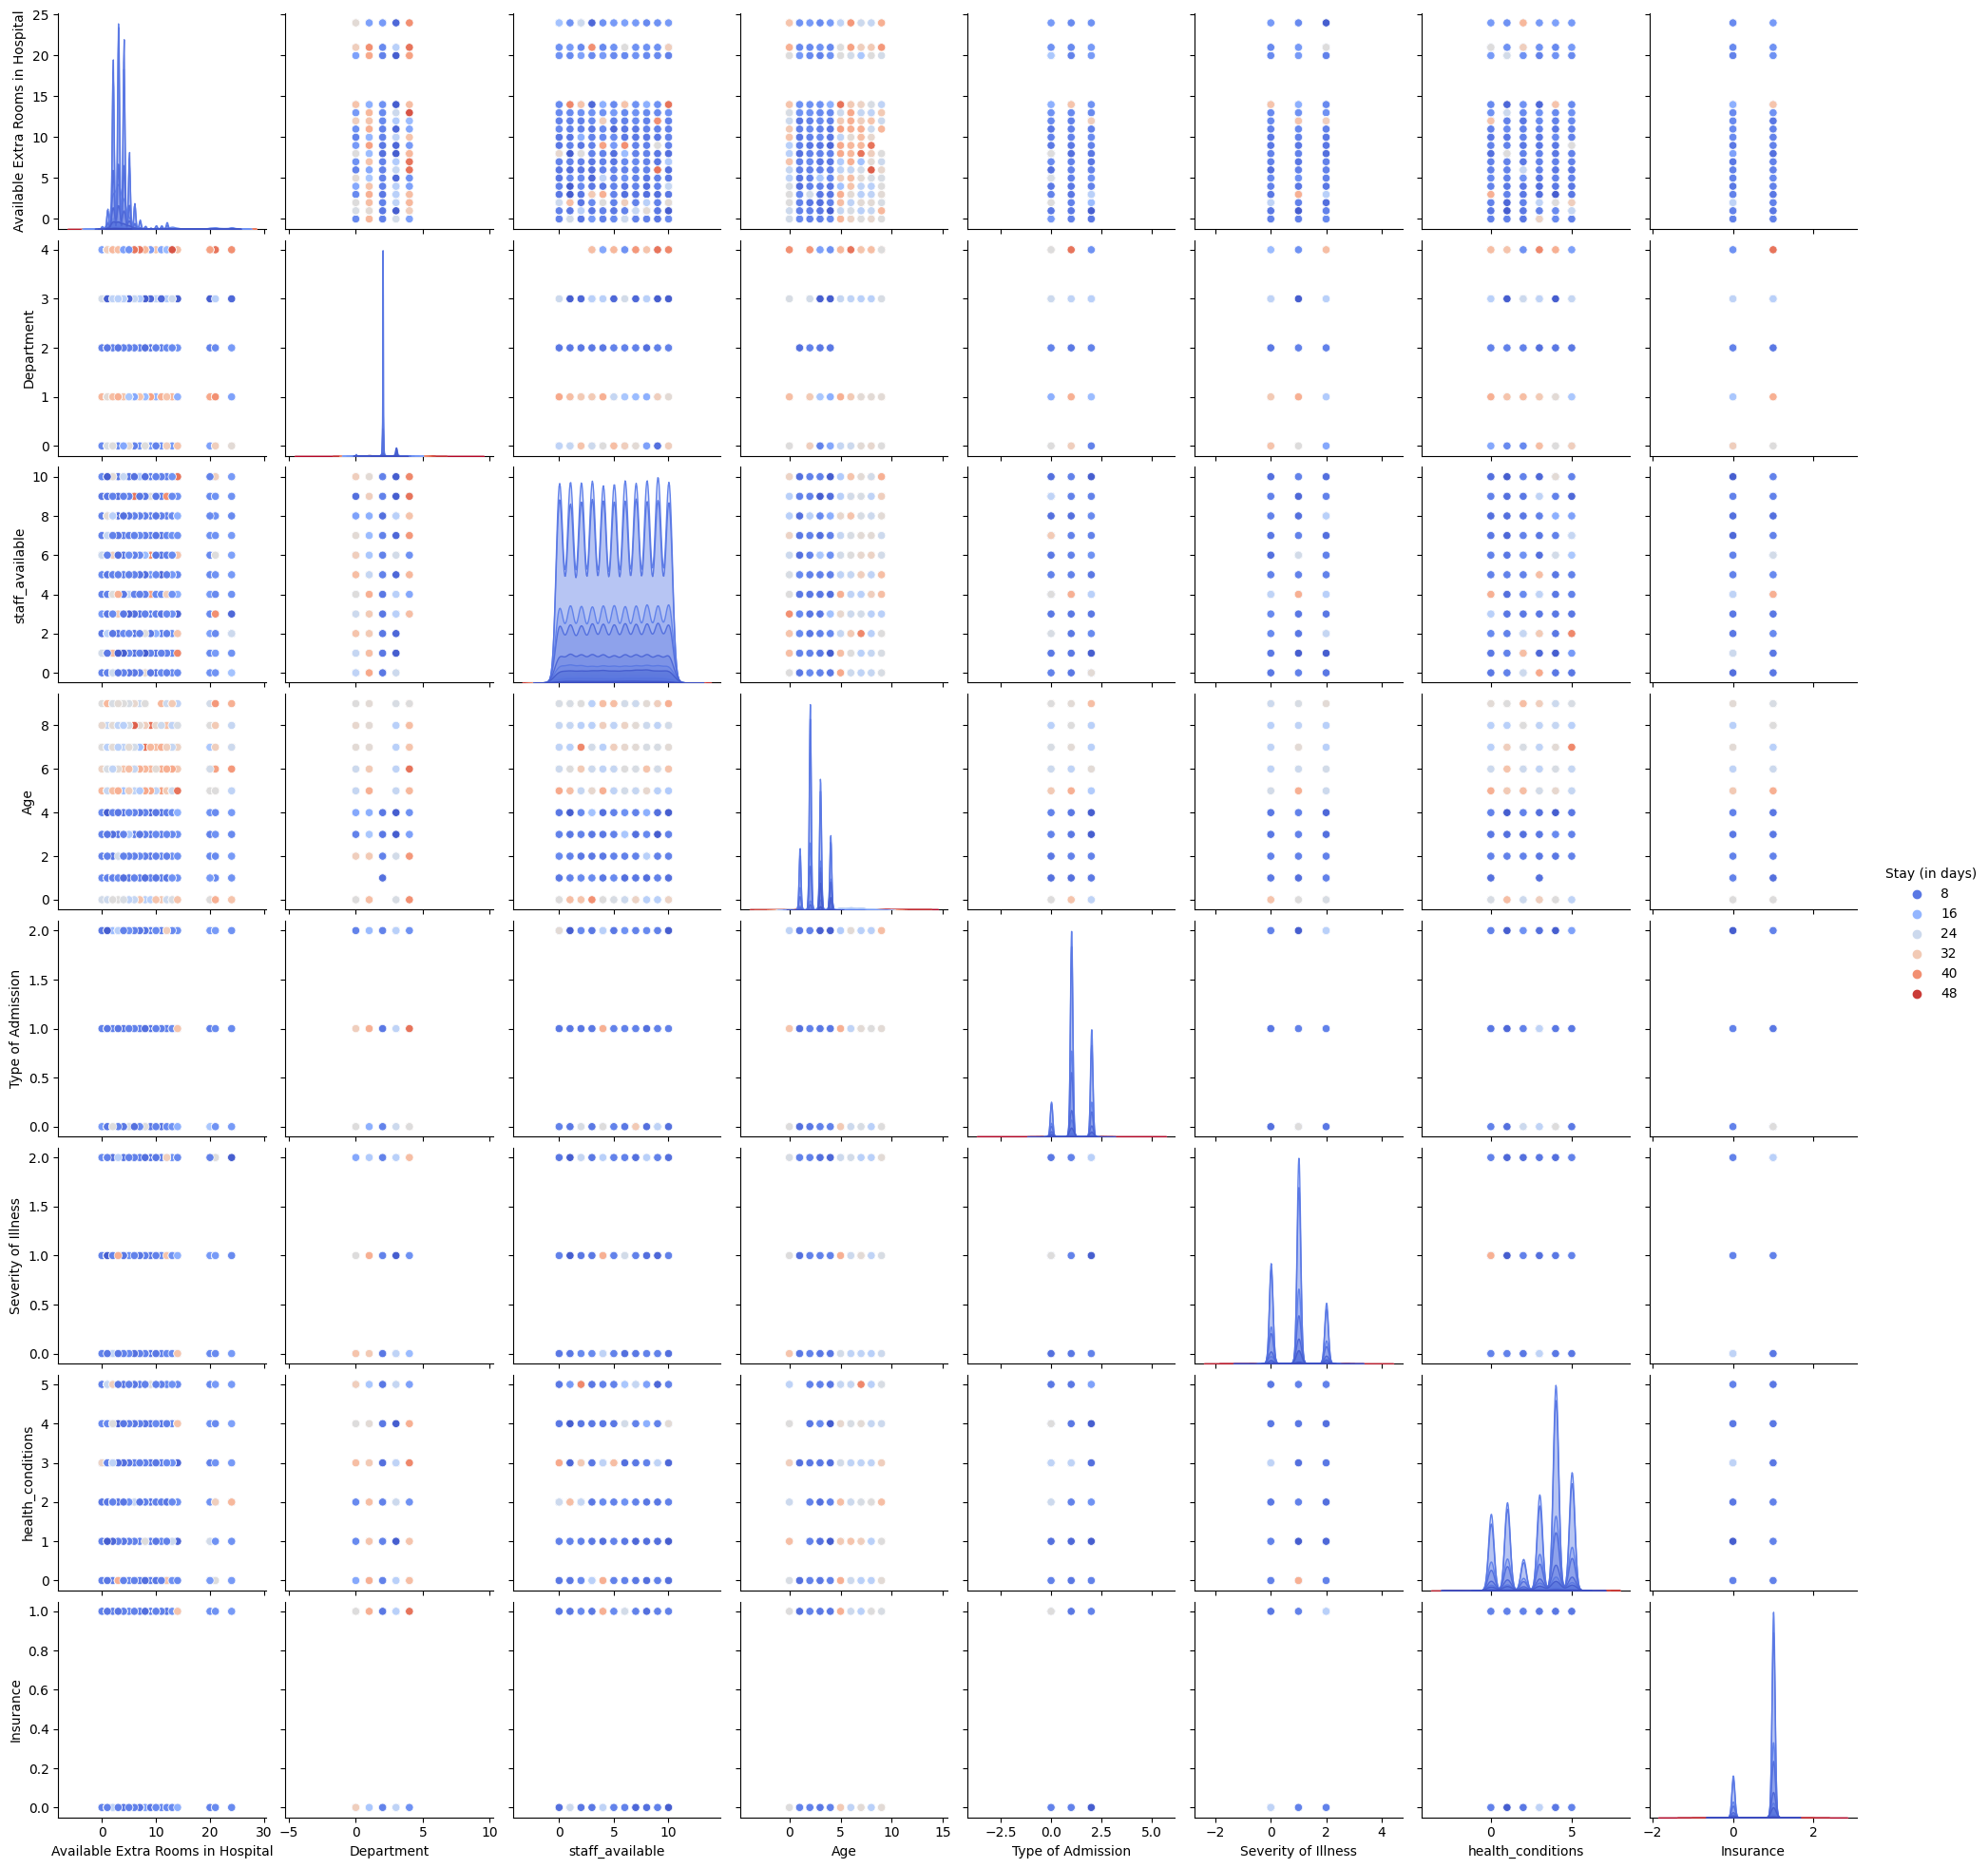

In [14]:
sns.pairplot(DF2, hue="Stay (in days)", palette = "coolwarm")

C:\Users\USER\AppData\Local\Temp\ipykernel_18264\3504236683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = DF2.corr(method="pearson")


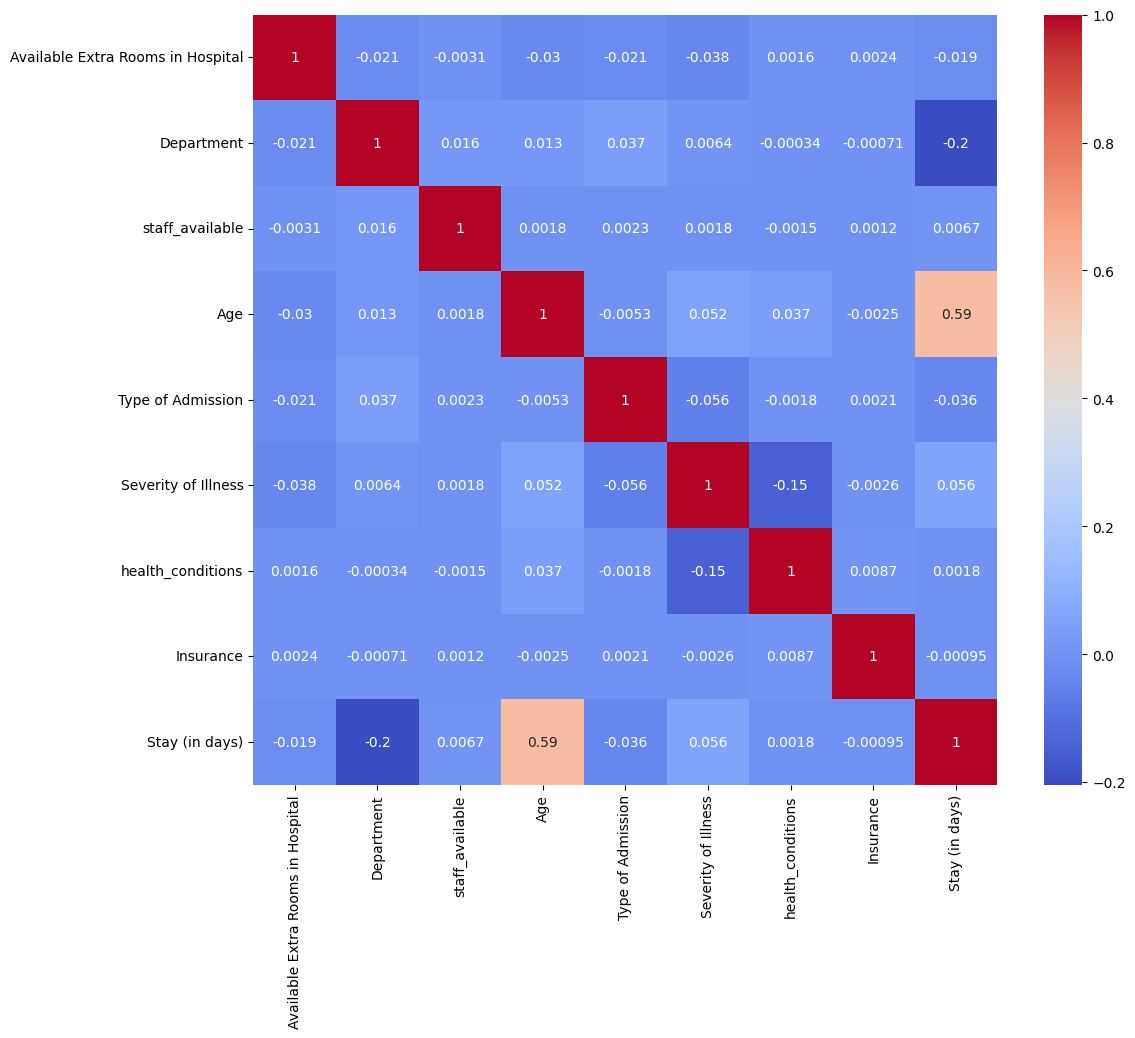

In [15]:
# Heatmap
corr = DF2.corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "coolwarm");

#### Realizamos los mismos cambios en nuestro documento de Testeo.

In [11]:
DFT = pd.read_csv("https://raw.githubusercontent.com/MelissaContreras/Datathon-1/main/hospitalizaciones_test.csv")
DFT

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901
89996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257
89997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075
89998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772


In [17]:
DFT.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

In [12]:
DFT2 = DFT.drop(['Ward_Facility_Code', 'doctor_name', 'patientid', 'Visitors with Patient', 'gender', 'Admission_Deposit'], axis=1)
DFT2.head()

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance
0,3,gynecology,10,21-30,Trauma,Moderate,Other,No
1,2,TB & Chest disease,4,51-60,Trauma,Moderate,Asthama,Yes
2,2,radiotherapy,7,51-60,Trauma,Moderate,None,No
3,2,gynecology,1,21-30,Trauma,Moderate,None,Yes
4,2,anesthesia,7,51-60,Trauma,Extreme,Diabetes,No


In [13]:
DFT2["Department"] = LabelEn.fit_transform(DFT2["Department"])

In [14]:
DFT2["Age"] = LabelEn.fit_transform(DFT2["Age"])    

In [15]:

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Urgent', 'Trauma','Emergency']])

# Entrenamos el codificador con la variable Type of Admission y la transformamos
encoder.fit(DFT2[["Type of Admission"]])
DFT2["Type of Admission"] = encoder.transform(DFT2[["Type of Admission"]])

In [16]:

# Creamos el codificador indicandole el orden de la variables
encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])

# Entrenamos el codificador con la variable "Severity of Illness" y la transformamos
encoder1.fit(DFT2[["Severity of Illness"]])
DFT2["Severity of Illness"] = encoder1.transform(DFT2[["Severity of Illness"]])

In [17]:
DFT2["health_conditions"] = LabelEn.fit_transform(DFT2["health_conditions"])

In [18]:
DFT2["Insurance"] = LabelEn.fit_transform(DFT2["Insurance"])

In [19]:
DFT2

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance
0,3,2,10,2,1.0,1.0,5,0
1,2,0,4,5,1.0,1.0,0,1
2,2,3,7,5,1.0,1.0,4,0
3,2,2,1,2,1.0,1.0,4,1
4,2,1,7,5,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...
89995,4,2,2,1,1.0,0.0,3,0
89996,13,2,8,3,2.0,1.0,5,0
89997,2,2,3,1,2.0,1.0,3,0
89998,2,3,1,6,1.0,2.0,1,0


## Modelo de Clasificación de Machine Learning: Árbol de Decisión

#### Importamos las librerías para nuestro modelo y las métricas a usar.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import recall_score


In [21]:
# Declaramos las variables para nuestro modelo. 

X = DF2.drop(["Stay (in days)"], axis=1)    
y = DF2["Stay (in days)"]                            


In [22]:
# Separamos los datos en Entrenamiento y Testeo. Un paso necesario previo al entrenamiento del modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((328000, 8), (82000, 8))

In [28]:
# Se define el clasificador
dt = DecisionTreeClassifier(max_depth=12)

# Se entrena el modelo
dt.fit(X_train, y_train)

# Predicciones
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Desempeño del modelo entrenado, calculando la precisión (accuracy)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo testeado, calculando la precisión (accuracy)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',dt_train_accuracy)
print('Desempeño del modelo para el Test set: ',dt_test_accuracy)

Desempeño del modelo para el Training set:  0.6984786585365854
Desempeño del modelo para el Test set:  0.698170731707317


In [29]:
# Desempeño del modelo en test, calculando el recall

recall = recall_score(y_test, y_test_pred, average= None)
recall

array([0.4237798 , 0.86424055])

#### Ingestamos los datos del CSV de testeo en el modelo de árbol de decisión ya entrenado con el dataset donde teniamos datos de salida. Ya que este es un modelo de aprendizaje supervisado.

In [30]:
pred = dt.predict(DFT2)

#### Agrego una fila al dataframe de testeo que será donde vaya su predicción.

In [31]:
DFT2["pred"]= pred

In [33]:
DFT2

,Available Extra Rooms in Hospital,Department,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,pred
0,3,2,10,2,1.0,1.0,5,0,1
1,2,0,4,5,1.0,1.0,0,1,1
2,2,3,7,5,1.0,1.0,4,0,1
3,2,2,1,2,1.0,1.0,4,1,1
4,2,1,7,5,1.0,2.0,1,0,1
...,...,...,...,...,...,...,...,...,...
89995,4,2,2,1,1.0,0.0,3,0,1
89996,13,2,8,3,2.0,1.0,5,0,1
89997,2,2,3,1,2.0,1.0,3,0,1
89998,2,3,1,6,1.0,2.0,1,0,1


#### Convertimos la columna de predicción en un dataframe para poder convertirlo a CSV. 

In [34]:
#Transformo la columna que predijo el modelo a Dataframe

Predicción = pd.DataFrame(DFT2["pred"])

#Finalmente guardo este Dataframe como CSV

ruta = "D:/Melissa/Modelo-Machine Learning/MelissaContreras.csv"

Predicción.to_csv(ruta,index=False, encoding='utf-8-sig')
